In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
train_dataset=datasets.FashionMNIST(root="data",train=True,download=True,transform=ToTensor())
test_dataset=datasets.FashionMNIST(root="data",train=False,download=True,transform=ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 12663338.61it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 205579.58it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3782302.55it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19108209.73it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_dataset
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [3]:
image,label=train_dataset[0]

In [4]:
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names=train_dataset.classes
class_names

class_to_idx=train_dataset.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(-0.5, 27.5, 27.5, -0.5)

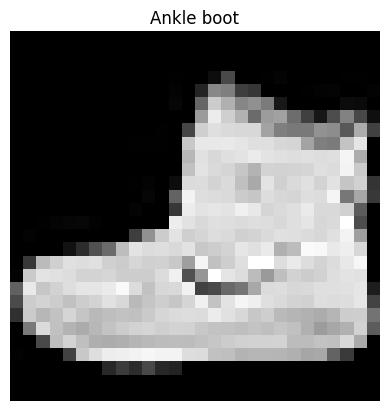

In [6]:
image, label =train_dataset[0]
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

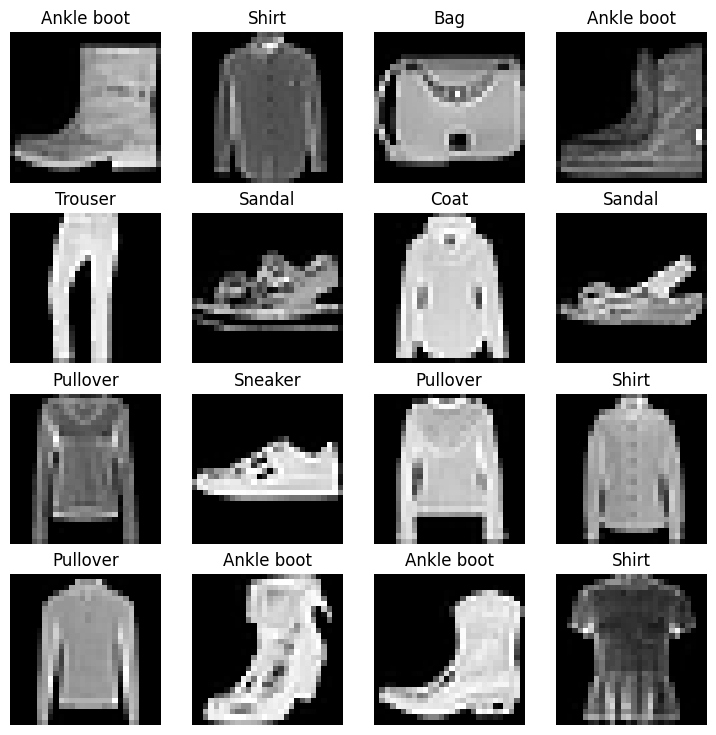

In [ ]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_dataset),size=[1]).item()
    img,label=train_dataset[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

trung data set into data loader

In [7]:
from torch.utils.data  import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=BATCH_SIZE,shuffle=False)

In [8]:
train_feature_batch,train_label_batch=next(iter(train_dataloader))
train_feature_batch.shape,train_label_batch.shape ,train_label_batch

(torch.Size([32, 1, 28, 28]),
 torch.Size([32]),
 tensor([1, 6, 1, 6, 8, 0, 1, 9, 4, 8, 9, 7, 0, 5, 9, 8, 9, 9, 6, 9, 8, 8, 8, 7,
         5, 4, 9, 8, 3, 8, 6, 4]))

(-0.5, 27.5, 27.5, -0.5)

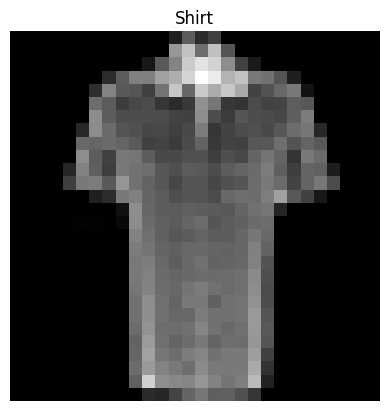

In [ ]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_feature_batch),size=[1]).item()
img,label=train_feature_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [ ]:
flatten_model=nn.Flatten()
x= train_feature_batch[0]
x.shape

torch.Size([1, 28, 28])

In [ ]:
output=flatten_model(x)
output.shape

In [ ]:
from torch import nn
class MnistModel(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int ,out_features:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=out_features))
  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_0=MnistModel(input_shape=784,hidden_units=10,out_features=len(class_names)).to("cpu")
model_0

MnistModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy=torch.rand([1,1,28,28])
model_0(dummy)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [9]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [10]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


NameError: name 'model_0' is not defined

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")

In [ ]:
start_time=timer()





end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")


Train time on cpu: 0.000 seconds


In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time=timer()
epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------" )
  train_loss=0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss/=len(train_dataloader)
  test_loss,test_acc=0,0
  model_0.eval()
with torch.inference_mode():
  for X,y in test_dataloader:
    test_pred=model_0(X)
    test_loss+=loss_fn(test_pred,y)
    test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
  test_loss/=len(test_dataloader)
  test_acc/=len(test_dataloader)
print(f"\nTrain loss:{train_loss:.4f} | Test loss:{test_loss:.4f}, Test acc:{test_acc:.4f}\n")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch:1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch:2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.4532 | Test loss:0.5109, Test acc:82.3782



Evaluation model

In [ ]:
torch.manual_seed(42)
def eval_model(model, data_loader, loss_fn, accuracy_fn):
  loss , acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"model_acc":acc}


In [ ]:
model_0_results=eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

In [ ]:
model_0_results

{'model_name': 'MnistModel',
 'model_loss': 0.5108762979507446,
 'model_acc': 82.37819488817891}

In [ ]:
from torch import nn
class MnistModel1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int ,out_features:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),

        nn.Linear(in_features=hidden_units,out_features=out_features),
        nn.ReLU())
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1=MnistModel(input_shape=784,hidden_units=10,out_features=len(class_names)).to("cpu")
model_1

MnistModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time=timer()
epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------" )
  train_loss=0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_1(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss/=len(train_dataloader)
  test_loss,test_acc=0,0
  model_0.eval()
with torch.inference_mode():
  for X,y in test_dataloader:
    test_pred=model_0(X)
    test_loss+=loss_fn(test_pred,y)
    test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
  test_loss/=len(test_dataloader)
  test_acc/=len(test_dataloader)
print(f"\nTrain loss:{train_loss:.4f} | Test loss:{test_loss:.4f}, Test acc:{test_acc:.4f}\n")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch:1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch:2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:2.3185 | Test loss:0.5109, Test acc:82.3782



In [ ]:
def train_step(model,dataloader,loss_fn,optimizer,accuracy_fn,device=None):


  train_loss=0
  train_acc=0
  model.train()
  for batch,(X,y) in enumerate(dataloader):



    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400==0:
      print(f"Looked at {batch*len(X)}/{len(dataloader.dataset)} samples")
  train_loss/=len(dataloader)
  train_acc/=len(dataloader)
  return {"train_loss":train_loss.item(),"train_acc":train_acc}



In [ ]:
def test_step(model,dataloader,loss_fn,optimizer,accuracy_fn,device=None):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in dataloader:
        test_pred=model(X)
        test_loss+=loss_fn(test_pred,y)
        test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(dataloader)
    test_acc/=len(dataloader)
  print(f"Test loss:{test_loss:.4f}, Test acc:{test_acc:.4f}\n")

In [ ]:
import torch
import torch.nn as nn

class FashionMnistCnn(nn.Module):
    def __init__(self, input_channels, output_shape, hidden_units):
        super().__init__()
        self.Cnv1_blk = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.Cnv2_blk = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Compute the flattened dimension size after the convolutions and pooling layers
        self.flattened_size = hidden_units * 7 * 7

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=self.flattened_size, out_features=output_shape)
        )

    def forward(self, x):
        x = self.Cnv1_blk(x)

        x = self.Cnv2_blk(x)

        x = self.classifier(x)

        return x



In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2=FashionMnistCnn(input_channels=1,output_shape=len(class_names),hidden_units=10).to("cpu")


In [ ]:
random_img=torch.rand(size=(1,28,28))
random_img.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(random_img.unsqueeze(0))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], grad_fn=<AddmmBackward0>)

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [ ]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [ ]:
from timeit import default_timer as timer


In [ ]:
import tqdm

In [ ]:
torch.manual_seed(42)

train_time=timer()
epochs=3

for epoch in (range(epochs)):
  print(f"Epoch:{epoch}\n-------" )
  train_step(model_2,train_dataloader,loss_fn,optimizer,accuracy_fn,device="cpu")
  test_step(model_2,test_dataloader,loss_fn,optimizer,accuracy_fn,device="cpu")
end_time=timer()


Epoch:0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Test loss:0.3200, Test acc:88.4685

Epoch:1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Test loss:0.3107, Test acc:88.5982

Epoch:2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Test loss:0.2953, Test acc:89.2572



In [ ]:
model_2_results=eval_model(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

In [ ]:
model_2_results


{'model_name': 'FashionMnistCnn',
 'model_loss': 0.2952914237976074,
 'model_acc': 89.25718849840256}

In [ ]:
def make_predic(model,data):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data :
       sample=torch.unsqueeze(sample,dim=0)
       pred_logit=model(sample)
       pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
       pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_dataset),k=9):
  test_samples.append(sample)
  test_labels.append(label)

(-0.5, 27.5, 27.5, -0.5)

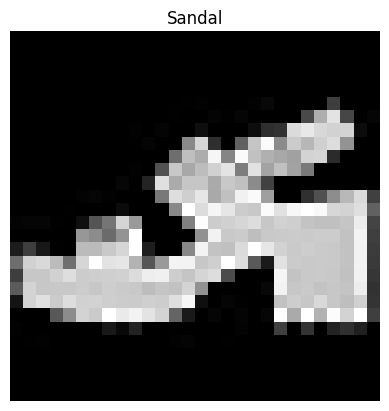

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [ ]:
pred_probs=make_predic(model=model_2,data=test_samples)

In [ ]:
pred_class=pred_probs.argmax(dim=1)

In [ ]:
pred_class

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

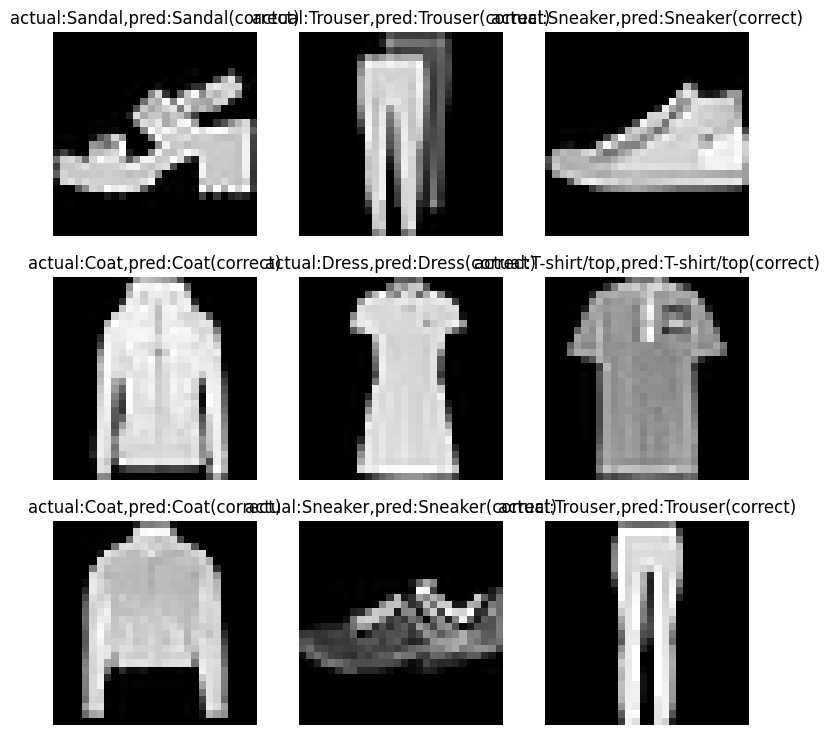

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  title=f"actual:{class_names[test_labels[i]]},pred:{class_names[pred_class[i]]}"
  if class_names[test_labels[i]]==class_names[pred_class[i]]:
    title+="(correct)"
  else:
    title+="(incorrect)"
  plt.title(title)
  plt.axis(False)

In [ ]:
#torch.save(obj=model_2.state_dict(),f=model_path)
#load_model=FashionMnistCnn(input_channel=1,hiddent_units=10, output_shape=10)
#load_model.load_state_dict(torch.load(f=model_path))